# Homework 07: Nonlinear Optimization

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

**Pre-requisite.** Install required packages for this assignment.

In [ ]:
using Pkg;
Pkg.add("Calculus")
Pkg.add("ForwardDiff")
Pkg.add("LaTeXStrings")
Pkg.add("NLopt")
Pkg.add("Plots")
Pkg.add("PythonPlot")
Pkg.add("Ipopt")

## Q.1. Constrained optimization

Consider the following optimization problem:

$ \max_{x} x_{1}^{0.5} x_{2}^{0.5} $

$ s.t. \ \ \ \ 0.5 x_{1} + x_{2} = 1 $

$ \ \ \ \ \ \ \ \ \ \ x_1, x_2 \geq 0 $ 

### A. Rewrite the above as an unconstraint problem (use the linear constraint to substitute out $x_2$)

Let $ f(x_1, x_2) = x_{1}^{0.5} x_{2}^{0.5} $.

Let $ g(x_1, x_2) = 0.5 x_{1} + x_{2} $.

Let $ x_2 = 1 - 0.5 x_1 $.

Substitute $x_2$ in $f$:

$ f(x_1) = x_{1}^{0.5} x_{2}^{0.5} $

$ =  x_{1}^{0.5} (1 - 0.5 x_1)^{0.5} $

$ = \sqrt{x_1} \sqrt{1 - \frac{x_1}{2}} $

Thus the optimization problem can be rewritten as the following unconstraint problem:

$ \max_{x} x_{1}^{0.5} (1 - 0.5 x_1)^{0.5} $

$ \ \ \ \ \ \ \ \ \ \ x_1 \geq 0 $ 


#### i. Plots the objective function for the feasible range for $x_1$

The feasible region for the objective function is where $f(x)$ is within the set of Real Numbers, which occurs when $x_1 \geq 0$ and $1 - 0.5 x_1 \geq 0$.

$1 - 0.5 x_1 \geq 0$

$x_1 \leq \frac{-1}{-0.5}$

$x_1 \leq 2$ 

Therefore, the feasible region for $x_1$ is $\{x_1: 0 \leq x_1\leq 2\}$.

Below, we plot the function $f(x_1)$ for the feasible range. We can see that the function is only continuous on the Real Number line within the feasible region, and that the objective value is maximum at $x \approx 1$, an interior point.

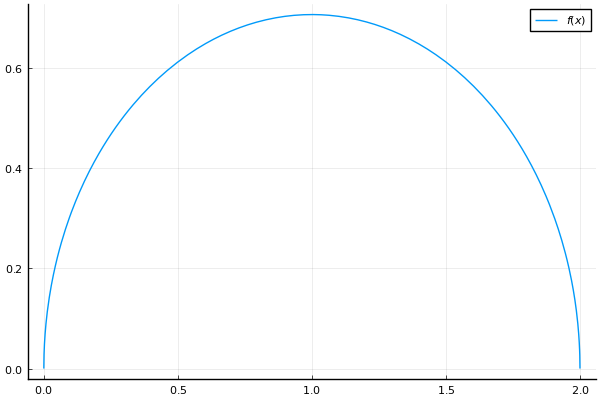

In [16]:
using LaTeXStrings, Plots
pythonplot()

x = 1:0.5:20
y = 1:0.5:10

f(x) = begin
        sqrt(x) * sqrt(1 - 0.5 * x)
    end

plot(f, 0, 2, label=L"f(x)")

#### ii. Write down the first order condition and find the solution (assume an interior solution).

The points at which the first-order derivative is equal to zero characterize the local minima, maxima and saddle points of the $f(x)$. Because $f(x)$ is univariate, finding the $\frac{d}{dx_1}$ will suffice as the gradient of $f$.

$ \frac{d}{dx_1} f(x_1) = \frac{d}{dx_1} x_1^{0.5} (1 - 0.5 x_1)^{0.5} = 0 $

Fortunately, this problem can be solved by hand with a closed-form solution.

$ \frac{d}{dx_1} f(x_1) = \frac{0.5 (1 - 0.5 x_1)^{0.5}}{x_1^{0.5}} - \frac{0.25 x_1^{0.5}}{(1 - 0.5 x_1)^{0.5}} $

We can try to verify that at $x = 1$, $ \frac{d}{dx_1} f(x_1) \approx 0$, indicating that $x_1 \approx 1$ is close to a critical point.

In [5]:
using Calculus

f(x) = sqrt(x) * sqrt(1 - 0.5 * x)

derivative(f, 1.0)

0.0

We can also use Julia to derive the first order derivative.

In [7]:
differentiate("sqrt(x) * sqrt(1 - 0.5 * x)", :x)

:((1 * ((1 / 2) / sqrt(x))) * sqrt(1 - 0.5x) + sqrt(x) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))))

$ \frac{d}{dx_1} f(x_1) = ((1 * \frac{\frac{1}{2}}{\sqrt{x_1}}) * \sqrt{1 - 0.5 x_1} + \sqrt{x_1} * ((0 - (0 * x_1 + 0.5 * 1)) * (\frac{\frac{1}{2}}{\sqrt{1 - 0.5 x_1}})) $

$ = \frac{\frac{1}{2}}{\sqrt{x_1}} \sqrt{0.5 x_1} -0.5 \sqrt{x_1} (\frac{\frac{1}{2}}{\sqrt{1 - 0.5 x_1}}) $

$ = \frac{\sqrt{1 - 0.5 x_1}}{2 \sqrt{x_1}} - \frac{\sqrt{0.25 x_1})}{\sqrt{1 - 0.5 x_1}} $

At the optimal point $x = 0$, the second derivative of the objective function is:

$ \frac{d}{dx_1} f(x_1 = 1) = \frac{\sqrt{1 - 0.5 * 1}}{2 \sqrt{1}} - \frac{\sqrt{0.25 * 1})}{\sqrt{1 - 0.5 * 1}} $

$ = \frac{\sqrt{1 - 0.5}}{2 \sqrt{1}} - \frac{\sqrt{0.25}}{\sqrt{1 - 0.5}} $

$ = \frac{\sqrt{0.5}}{2} - \frac{\sqrt{0.25}}{\sqrt{0.5}} $

$ \approx 5.55112×10^-17 $

This is close enough to zero to suggest that at $x=1.0$, we are near to a local maxima. 

Confirming by evaluating the first-order derivative at $x = 1.0$. 

In [8]:
using ForwardDiff

dfdx = x -> ForwardDiff.derivative(f, x)
dfdx(1)

5.551115123125783e-17

$ \frac{d}{dx_1} f(x_1 = 1) \approx 0 $ suggests this is an inflection point. With the first order condition is met, and we evaluate second order conditions at the critical point $x_1$ to understand whether $f$ is at a local maxima or minima at $x_1$.

#### iii. Derive the second derivative of the objective function at the optimal.

Using Julia to derive the second derivative symbolically:

In [9]:
differentiate("((1 * ((1 / 2) / sqrt(x))) * sqrt(1 - 0.5x) + sqrt(x) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))))", :x)

:(((0 * ((1 / 2) / sqrt(x)) + 1 * ((-(1 * ((1 / 2) / sqrt(x))) * (1 / 2)) / sqrt(x) ^ 2)) * sqrt(1 - 0.5x) + (1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x)))) + ((1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) + sqrt(x) * ((0 - ((0 * x + 0 * 1) + (0 * 1 + 0.5 * 0))) * ((1 / 2) / sqrt(1 - 0.5x)) + (0 - (0 * x + 0.5 * 1)) * ((-((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) * (1 / 2)) / sqrt(1 - 0.5x) ^ 2))))

$ \frac{d^2}{dx_1^2} f(x_1) = (((0 * ((1 / 2) / sqrt(x)) + 1 * ((-(1 * ((1 / 2) / sqrt(x))) * (1 / 2)) / sqrt(x) ^ 2)) * sqrt(1 - 0.5x) + (1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x)))) + ((1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) + sqrt(x) * ((0 - ((0 * x + 0 * 1) + (0 * 1 + 0.5 * 0))) * ((1 / 2) / sqrt(1 - 0.5x)) + (0 - (0 * x + 0.5 * 1)) * ((-((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) * (1 / 2)) / sqrt(1 - 0.5x) ^ 2)))) $

$ = - \frac{0.5}{(2 - x_1) \sqrt{1 - 0.5 x_1} x_1^{\frac{3}{2}}} $

#### iv. Evaluate the second derivative at the optimal value of $x_1$ and for the entire feasible range. Plots your results.

At the optimal point $x = 1.0$, the second derivative of the objective function is:

$ \frac{d^2}{dx_1^2} f(x_1 = 1) = - \frac{0.5}{(2 - 1) \sqrt{1 - 0.5} 1^{\frac{3}{2}}} $

$ = - \frac{1}{2\sqrt{\frac{1}{2}}} $

$ \approx -0.707107 $

$ \frac{d^2}{dx_1^2} f(x_1 = 1) < 0 $ suggests that $x_1$ is at a local maxima.

Confirming by evaluating the second derivative with Julia below.

In [10]:
dfdx = x -> ForwardDiff.derivative(f, x)
d2fdx2 = x -> ForwardDiff.derivative(dfdx, x)
d2fdx2(1)

-0.7071067811865475

That is approximate to the value we found above, $-0.7071$.

Below, we plot the second derivative $\frac{d^2}{dx_1^2}$ (green line), along with $\frac{d}{dx_1}$ (red line) and $f$ (blue line) for reference. $x=0$ does appear to be approximately where the minimum, and critical point of the first and second derivatives lie.

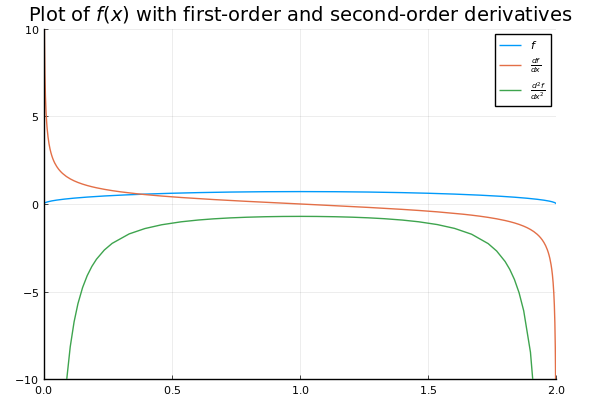

In [22]:
x = 1:0.5:20

dfdx = x -> ForwardDiff.derivative(f, x)
d2fdx2 = x -> ForwardDiff.derivative(dfdx, x)

plot(
    [f, dfdx, d2fdx2],
    xlims=[0, 2],
    ylims=[-10, 10],
    label=[L"f" L"\frac{df}{dx}" L"\frac{d^2f}{dx^2}"],
    title=L"Plot of $f(x)$ with first-order and second-order derivatives"
)

#### v. Find the solution using a `Optim` package, and the `GoldenSection()` solver option.

In [28]:
using Optim

opt = Optim.maximize(f, 0, 2, GoldenSection())

Results of Maximization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.000000, 2.000000]
 * Maximizer: 1.000000e+00
 * Maximum: 7.071068e-01
 * Iterations: 37
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 38

In [29]:
Optim.maximum(opt)

0.7071067811865476

The `Optim` confirms our analytic findings above. The maximum is $f(x=1)=0.7071$.

### B. Write out the Lagrange of the original optimization problem

**Recall Lagrange**:

Suppose the gradients of $f$ and $g$ are parallel and proportional to each other. Then, $\nabla f(x*)$ is a linear combination of $\nabla g(x*)$, and the gradients $\nabla f(x*), \nabla g(x*)$ are in the same direction, and there exists a \lambda to describe this proportion. Therefore, the relationship between $f$ and $g$ can be written as such:

$ \nabla f(x*) = \lambda \nabla g(x*)$

$ \nabla f(x*) + \lambda \nabla g(x*) = 0$

We can rewrite the optimization problem with the Lagrange multiplier:

$ \max_{x} l(x, \lambda) = f(x) + \lambda g(x) $

$ s.t. \ \ \ \ \nabla_x l(x, \lambda) = \nabla f(x*) + \lambda \nabla g(x*) = 0  $

$ \ \ \ \ \ \ \ \ \ \ \nabla_\lambda l(x, \lambda) = g(x*) = 1 $ 

**Recall $f, g$**:

$ f(x_1, x_2) = x_{1}^{0.5} x_{2}^{0.5} $.

$ g(x_1, x_2) = 0.5 x_{1} + x_{2} -1 $.


Substituting $f, g$ into $l(h, \lambda)$:

$ l(x, \lambda) = x_{1}^{0.5} x_{2}^{0.5} + \lambda (0.5 x_{1} + x_{2}-1) $

Based on the Lagrange, we can rewrite the optimization problem as:

$ \max_{x} x_{1}^{0.5} x_{2}^{0.5} + \lambda (0.5 x_{1} + x_{2}-1) $

$ s.t. x ∈ Ω ⊆ 𝐸_𝑛 $

#### i. Derive the first order conditions

The necessary conditions to for a Lagrangian nonlinear constraint problem can be expressed as:

$ \nabla_x l(x, \lambda) = \nabla f(x*) + \lambda \nabla g(x*) = 0  $

$ \nabla_\lambda l(x, \lambda) = g(x*) = 1 $

Therefore, we must find $\nabla f, \nabla g$:

$ f_{x_1}' = \frac{df}{dx_1} = \frac{0.5 x_{2}^{0.5}}{x_{1}^{0.5}} $

$ f_{x_2}' = \frac{df}{dx_2} = \frac{0.5 x_{1}^{0.5}}{x_{2}^{0.5}} $

$ g_{x_1}' = 0.5 $

$ g_{x_2}' = 1 $

$ \nabla f(x_1, x_2) = \begin{bmatrix}
  f_{x_1}' \\
  f_{x_2}'
\end{bmatrix} = \begin{bmatrix} 
  \frac{0.5 x_{2}^{0.5}}{x_{1}^{0.5}} \\
  \frac{0.5 x_{1}^{0.5}}{x_{2}^{0.5}}
\end{bmatrix} $

$ \nabla g(x_1, x_2) = \begin{bmatrix}
  g_{x_1}' \\
  g_{x_2}'
\end{bmatrix} = \begin{bmatrix} 
  0.5 \\
  1
\end{bmatrix} $

Deriving $ \nabla_x l(x, \lambda)$ and substituting $\nabla f, \nabla g$:

$ \nabla_x l(x, \lambda) = \nabla f(x*) + \lambda \nabla g(x*) $

$ = \begin{bmatrix} 
  \frac{0.5 x*_{2}^{0.5}}{x*_{1}^{0.5}} \\
  \frac{0.5 x*_{1}^{0.5}}{x*_{2}^{0.5}}
\end{bmatrix} - \lambda \begin{bmatrix} 
  0.5 \\
  1
\end{bmatrix} $

$ = \begin{bmatrix} 
  \frac{0.5 x*_{2}^{0.5}}{x*_{1}^{0.5}} - 0.5 \lambda \\
  \frac{0.5 x*_{1}^{0.5}}{x*_{2}^{0.5}} - 1 \lambda
\end{bmatrix} $

We are left with the first order conditions: 

$ \frac{0.5 x_{2}^{0.5}}{x_{1}^{0.5}} - 0.5 \lambda = 0 $

$ \frac{0.5 x_{1}^{0.5}}{x_{2}^{0.5}} - \lambda = 0 $

$ 1 - 0.5 x_{1} - x_{2} = 0 $



#### ii. Solve the first order conditions and find the LaGrange multiplier value

First put lambda on one side of the first two equations:

For $\frac{dl}{dx_1}$:

$ 0.5 \lambda = \frac{0.5 x_{2}^{0.5}}{x_{1}^{0.5}} $

$ \lambda = \frac{x_{2}^{0.5}}{x_{1}^{0.5}} $

For $\frac{dl}{dx_2}$:

$ \lambda = \frac{x_{1}^{0.5}}{x_{2}^{0.5}} $

Now we can set the two equations equal to each other:

$ \frac{x_{2}^{0.5}}{x_{1}^{0.5}} = \frac{x_{1}^{0.5}}{2x_{2}^{0.5}} $

And find $x_1$ with respect to $x_2$

$ x_{2} = 0.5x_{1} $

We can now use the third equation to find the values of $x_1$ and $x_2$ since $\lambda$ dropped out:

$x_{1} = 1 $

$x_{2} = 0.5 $

And finally we plug the value of $x_1$ and $x_2$ in and solve for $\lambda$.



$ \lambda = \frac{x_{1}^{0.5}}{2x_{2}^{0.5}} $

$ \lambda = \frac{\sqrt{1}}{2\sqrt{0.5}} $

In [3]:
1/(2*sqrt(0.5))

0.7071067811865475

$ \lambda \approx 0.7071 $

### C. Find the solution to the original problem using Julia's `NLopt` and the `LD_SLSQP` solver.

Consider the following optimization problem:

$ \max_{x} x_{1}^{0.5} x_{2}^{0.5} $

$ s.t. \ \ \ \ 0.5 x_{1} + x_{2} = 1 $

$ \ \ \ \ \ \ \ \ \ \ x_1, x_2 \geq 0 $ 

In [45]:
using JuMP
using NLopt

model = Model(NLopt.Optimizer)
set_optimizer_attribute(model, "algorithm", :LD_SLSQP)

@variable(model, x1)
@variable(model, x2 >= 0)

@NLobjective(model, Max, x1^(0.5) * x2^(0.5))
@NLconstraint(model, 0.5 * x1 + x2 == 1)

set_start_value(x1, 1.234)
set_start_value(x2, 5.678)

JuMP.optimize!(model)

println("got ", objective_value(model), " at ", [value(x1), value(x2)])

got 0.7071067811865476 at [0.9999999999970786, 0.5000000000014607]


This verifies our solutions found earlier.

## Q.2.

You were given a sample of size $N$ containing a response variable $y$ and predictors $x_j, j=1,2,...,k$. Let $y$ be a $N×1$ vector with values for response varaible, and $X$ be a $N×k$ matrix containing the values for each predictor. Assume that the first predictor takes the value of $1$ for every observation. Lately, assume that the response variable $y$ is lienarly related to the predictors.

### A. Write out the least-squares minimization problem in matrix for

$RSS=(y-X\beta)^T(y-X\beta)$


### B. Write out the first order conditions, and derive the closed-form solution, $\beta$ in matrix notation.

$\frac{\partial{RSS}}{\partial{\beta}} = -2X^Ty+2X^TX\beta = 0$

$\Rightarrow X^T(y-X\beta)=0$

$X^Ty=X^TX\beta$

$\Rightarrow\hat{\beta}=(X^TX)^{-1}X^Ty$




### C. Given the dataset provided


#### i. Create the matrix $y$ and $X$ and compute the value of $\beta$ 


In [13]:
using CSV, DataFrames

Data = CSV.read("yX.csv",DataFrame,delim=",")

Data[!,"x1"] = repeat([1],outer=size(Data)[1])
y = Data[!,"y"]
X = Data[!,["x1","x2","x3","x4"]]
X_mat = Matrix(X)


using LinearAlgebra
inv(transpose(X_mat)*X_mat)*transpose(X_mat)*y


4-element Vector{Float64}:
 1000.2764693896956
   30.521523549834285
    0.04678711312337555
  -49.949998276567584

#### ii. Compute the optimal $\beta$ using a Julia optimization solver.

Define our variables $\beta$: 

* $\beta_1$ is the coefficent of $x_{1}$
* $\beta_2$ is the coefficent of $x_{2}$
* $\beta_3$ is the coefficent of $x_{3}$
* $\beta_4$ is the coefficent of $x_{4}$


There is no constraint.


The objective function is defined as:


$$ min\ \  (y-X\beta)^T(y-X\beta) $$



In [17]:

using JuMP, Ipopt

m = Model(Ipopt.Optimizer)

@variable(m,beta[1:4])
@objective(m,Min,transpose(y-X_mat*beta)*(y-X_mat*beta))

@time begin
    status = optimize!(m)
end
println("Objective value: ", JuMP.objective_value(m))
println("x1 = ", JuMP.value(beta[1]))
println("x2 = ", JuMP.value(beta[2]))
println("x3 = ", JuMP.value(beta[3]))
println("x4 = ", JuMP.value(beta[4]))



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0026177e+09 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### We got the same results from the two methods!